# Exercise - Replicating Regressions

### Data
* Use the file, `data/port_decomp_example.xlsx`.

The data file contains...
* Return rates, $r_t^i$, for various asset classes, (via ETFs.)
* Most notable among these securities is `SPY`, the return on the S&P 500. Denote this as $r^{\spy}_t$.
* A separate tab gives return rates for a particular portfolio, $r_t^p$.

$$\newcommand{\spy}{\text{spy}}$$
$$\newcommand{\hyg}{\text{hyg}}$$

$$\newcommand{\targ}{EEM}$$

# 1. Decomposition

### 1. Single Factor Exposure
Estimate the regression of the portfolio return on `SPY`:

$$r^p_t = \alpha + \beta r^{\spy}_t + \epsilon_t^{p,\spy}$$

Specifically, report your estimates of alpha, beta, and the r-squared.

### 2. Multi-factor Exposure
Estimate the regression of the portfolio return on `SPY` and on `HYG`, the return on high-yield
corporate bonds, denoted as $r^{\hyg}_t$:

$$r^p_t = {\alpha} + {\beta}^{\spy}r^{\spy}_t + {\beta}^{\hyg}r^{\hyg}_t + {\epsilon}_t$$

Specifically, report your estimates of alpha, the betas, and the r-squared.

*Note that the parameters (such as $\beta^{\spy}$) in this multivariate model are not the same as used in the univariate model of part 1. 

### 3. Replication Values
Calculate the series of fitted regression values, sometimes referred to as $\hat{y}$ in standard textbooks:

$$\hat{r}^p_t = \hat{\alpha} + \hat{\beta}^{\spy}r^{\spy}_t + \hat{\beta}^{\hyg}r^{\hyg}_t$$

Your statistical package will output these fitted values for you, or you can construct them using the estimated parameters.

How does this compare to the r-squared of the regression in problem 2?

### 4. Uni vs Multi
How do the `SPY` betas differ across the univariate and multivariate models? How does this relate to the
correlation between $r^{\spy}$ and $r^{\hyg}$?

# <span style='color:red'>Solution 1</span>

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt

In [ ]:
INFILE = "../data/assignment_2_data.xlsx"
info = pd.read_excel(INFILE,sheet_name='descriptions').set_index('ticker')
info

,shortName,quoteType,currency,volume,totalAssets,longBusinessSummary
ticker,,,,,,
SPY,SPDR S&P 500,ETF,USD,25604208,627773800448,The Trust seeks to achieve its investment obje...
EFA,iShares MSCI EAFE ETF,ETF,USD,10653257,54985711616,The fund generally will invest at least 80% of...
EEM,iShares MSCI Emerging Index Fun,ETF,USD,17962107,17468592128,The fund generally will invest at least 80% of...
PSP,Invesco Global Listed Private E,ETF,USD,8928,277930496,The fund generally will invest at least 90% of...
QAI,NYLI Hedge Multi-Strategy Track,ETF,USD,49257,637390272,"The fund is a ""fund of funds"" which means it i..."
HYG,iShares iBoxx $ High Yield Corp,ETF,USD,22374708,15881510912,The underlying index is a rules-based index co...
DBC,Invesco DB Commodity Index Trac,ETF,USD,478168,1387142912,The fund pursues its investment objective by i...
IYR,iShares U.S. Real Estate ETF,ETF,USD,2699001,4990495744,The fund seeks to track the investment results...
IEF,iShares 7-10 Year Treasury Bond,ETF,USD,2340833,32854654976,The underlying index measures the performance ...


In [ ]:
rets = pd.read_excel(INFILE,sheet_name='total returns').set_index('Date')
rets

,BWX,DBC,EEM,EFA,HYG,IEF,IYR,PSP,QAI,SHV,SPY,TIP
Date,,,,,,,,,,,,
2015-02-28,-0.010834,0.044253,0.044080,0.063378,0.022312,-0.024717,-0.025976,0.064102,0.034138,0.000181,0.056204,-0.012886
2015-03-31,-0.013922,-0.060539,-0.014973,-0.014286,-0.009478,0.008561,0.010745,-0.010454,-0.001667,-0.000091,-0.015706,-0.004819
2015-04-30,0.019579,0.071471,0.068527,0.036466,0.008714,-0.006330,-0.048160,0.053982,0.002004,0.000091,0.009834,0.006779
2015-05-31,-0.032312,-0.031711,-0.041045,0.001955,0.003555,-0.004164,-0.003311,0.026868,-0.000333,0.000000,0.012856,-0.010056
2015-06-30,-0.007442,0.016375,-0.029309,-0.031182,-0.018871,-0.016309,-0.043979,-0.019153,-0.013671,0.000091,-0.020312,-0.010246
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-31,0.030519,-0.020815,0.009779,0.032603,0.015474,0.013458,0.054008,0.001225,0.007648,0.004979,0.023366,0.007990
2024-09-30,0.023484,0.007237,0.057413,0.007833,0.016971,0.013825,0.030631,0.051617,0.014548,0.004586,0.021005,0.014976
2024-10-31,-0.048497,0.014369,-0.030746,-0.052732,-0.009636,-0.033874,-0.034947,-0.013779,-0.005923,0.003576,-0.008924,-0.018469


In [ ]:
port =  pd.read_excel(INFILE,sheet_name='portfolio returns').set_index('Date')
port

,portfolio
Date,
2015-02-28,0.011887
2015-03-31,0.001796
2015-04-30,0.000374
2015-05-31,0.004765
2015-06-30,-0.023278
...,...
2024-08-31,0.019085
2024-09-30,0.027655
2024-10-31,-0.022130


### <span style='color:red'>1.1</span>

In [ ]:
X = sm.add_constant(rets['SPY'])
y = port
mod = sm.OLS(y, X).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              portfolio   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     414.7
Date:                Tue, 07 Jan 2025   Prob (F-statistic):           2.86e-40
Time:                        16:34:05   Log-Likelihood:                 329.70
No. Observations:                 119   AIC:                            -655.4
Df Residuals:                     117   BIC:                            -649.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0034      0.001     -2.332      0.021      -0.006      -0.001
SPY            0.6474      0.032     20.365      0.000       0.584       0.710
==============================================================================
Omnibus:                        3.740   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.154   Jarque-Bera (JB):                3.181
Skew:                           0.314   Prob(JB):                        0.204
Kurtosis:                       3.497   Cond. No.                         22.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### <span style='color:red'>1.2</span>

In [ ]:
X = sm.add_constant(rets[['SPY', 'HYG']])
y = port
mod_multi = sm.OLS(y, X).fit()
mod_multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              portfolio   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     274.1
Date:                Tue, 07 Jan 2025   Prob (F-statistic):           1.10e-44
Time:                        16:34:05   Log-Likelihood:                 343.45
No. Observations:                 119   AIC:                            -680.9
Df Residuals:                     116   BIC:                            -672.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0027      0.001     -2.051      0.043      -0.005   -9.11e-05
SPY            0.4241      0.050      8.549      0.000       0.326       0.522
HYG            0.5404      0.098      5.492      0.000       0.346       0.735
==============================================================================
Omnibus:                        0.907   Durbin-Watson:                   2.253
Prob(Omnibus):                  0.635   Jarque-Bera (JB):                0.879
Skew:                           0.204   Prob(JB):                        0.644
Kurtosis:                       2.898   Cond. No.                         85.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Notice that the beta on SPY is much lower now that we include `HYG`. Also note that the R-squared is a little higher.

### <span style='color:red'>1.3.</span>

The squared correlation is exactly the R^2, as R^2 captures the correlation of Portfolio's return and the combined space spanned by both regressors.

In [ ]:
corr_port = port.corrwith(mod.fittedvalues).iloc[0]
corr_port_multi = port.corrwith(mod_multi.fittedvalues).iloc[0]
print(f'Correlation between portfolio and replication: {corr_port_multi:.2%}.')
print(f'Square of this correaltion is {corr_port_multi**2:.2%}\nwhich equals the R-squared.')

Correlation between portfolio and replication: 90.85%.
Square of this correaltion is 82.54%
which equals the R-squared.


### <span style='color:red'>1.4.</span>

In [ ]:
TICKreg1 = 'SPY'
TICKreg2 = 'HYG'
corrREGS = rets[TICKreg2].corr(rets[TICKreg1])
print(f'Correlation between {TICKreg1} and {TICKreg2} is {corrREGS:.1%}')

Correlation between SPY and HYG is 81.9%


The beta for SPY in (2) is much smaller than in (1). This is because HYG and SPY are significantly correlated, therefore a large proportion of the variation in the Portfolio return which was being attributed to SPY (in eq 1) was actually better explained by HYG. Thus, in eq (2) this gets attributed more directly to HYG, and less is attributed to SPY.

***

# 2. Portfolio Decomposition

### 1. Decompose portfolio holdings
The portfolio return, $r_t^p$, is a combination of the base assets that are provided here. Use linear regression to uncover which weights were used in constructing the portfolio.

$$r_t^p = \alpha +\left(\boldsymbol{\beta}\right)' \boldsymbol{r}_t + \epsilon_t$$

where $\boldsymbol{r}$ denotes the vector of returns for the individual securities.
* What does the regression find were the original weights?
* How precise is the estimation? Consider the R-squared and t-stats.

*Feel free to include an $\alpha$ in this model, even though you know the portfolio is an exact function of the individual securities. The estimation should find $\alpha$ of (nearly) zero.*


### 2. Replicate an asset

Suppose that we want to mimic a return, **EEM** using the other returns. Run the following regression–but
do so **only using data through the end of `2022`.**

$$r_t^{\targ} = \alpha +\left(\boldsymbol{\beta}^{\boldsymbol{r}}\right)' \boldsymbol{r}_t + \epsilon_t$$

where $\boldsymbol{r}$ denotes the vector of returns for the other securities, excluding the target, **EEM**.

#### (a) 
Report the r-squared and the estimate of the vector, $\boldsymbol{\beta}$.

#### (b) 
Report the t-stats of the explanatory returns. Which have absolute value greater than 2?

#### (c) 
Plot the returns of **EEM** along with the replication values.

### 3. Out-of-Sample Fit
Perhaps the replication results in the previous problem are overstated given that they estimated the parameters within a sample and then evaluated how well the result fit in the same sample. This is known as in-sample fit.

Using the estimates through `2022`, (the α and βˆ from the previous problem,) calculate the out-of-sample (OOS) values of the replication, using the `2023-2024` returns, denoted $\boldsymbol{r}_t^{\text{oos}}$:

$$\hat{r}_t^{\targ} = \left(\widehat{\boldsymbol{\beta}}^{\boldsymbol{r}}\right)' \boldsymbol{r}_t^{\text{oos}}$$

#### (a) 
What is the correlation between $\hat{r}_t^{\targ}$ and $\boldsymbol{r}_t^{\text{oos}}$?

#### (b) 
How does this compare to the r-squared from the regression above based on in-sample data, (through `2022`?)

***

# <span style='color:red'>Solution 2</span>

## <span style='color:red'>2.1</span>

In [ ]:
X = sm.add_constant(rets)
y = port
mod_exact = sm.OLS(y, X).fit()
display(mod_exact.params.to_frame().rename(columns={0:'weights'}).sort_values('weights',ascending=False).T.style.format('{:.2f}'))
mod_exact.summary()

,IYR,PSP,QAI,IEF,SHV,EEM,EFA,HYG,const,BWX,DBC,SPY,TIP
weights,0.25,0.25,0.25,0.25,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              portfolio   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.685e+29
Date:                Tue, 07 Jan 2025   Prob (F-statistic):               0.00
Time:                        16:34:05   Log-Likelihood:                 4114.2
No. Observations:                 119   AIC:                            -8202.
Df Residuals:                     106   BIC:                            -8166.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.735e-16    3.3e-17      5.259      0.000    1.08e-16    2.39e-16
BWX         1.665e-16   2.13e-15      0.078      0.938   -4.05e-15    4.39e-15
DBC         6.939e-18   6.74e-16      0.010      0.992   -1.33e-15    1.34e-15
EEM         7.008e-16   9.75e-16      0.719      0.474   -1.23e-15    2.63e-15
EFA         3.634e-16   1.57e-15      0.232      0.817   -2.74e-15    3.47e-15
HYG         2.776e-16   2.28e-15      0.122      0.903   -4.25e-15     4.8e-15
IEF            0.2500      3e-15   8.34e+13      0.000       0.250       0.250
IYR            0.2500   8.33e-16      3e+14      0.000       0.250       0.250
PSP            0.2500   1.08e-15   2.31e+14      0.000       0.250       0.250
QAI            0.2500   5.36e-15   4.66e+13      0.000       0.250       0.250
SHV          1.11e-15   1.58e-14      0.070      0.944   -3.02e-14    3.24e-14
SPY                 0   1.56e-15          0      1.000    -3.1e-15     3.1e-15
TIP        -1.665e-16    3.8e-15     -0.044      0.965   -7.69e-15    7.36e-15
==============================================================================
Omnibus:                       17.654   Durbin-Watson:                   0.719
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.094
Skew:                           0.563   Prob(JB):                     5.35e-09
Kurtosis:                       5.533   Cond. No.                         702.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## <span style='color:red'>2.2</span>

In [ ]:
T1 = '2022'
T2 = '2023'
TICKrep = 'EEM'

rets_IS = rets.loc[:T1,:]

X = sm.add_constant(rets_IS.drop(columns=TICKrep))
y = rets_IS[[TICKrep]]
mod_replicate = sm.OLS(y, X).fit()
mod_replicate.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    EEM   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     28.25
Date:                Tue, 07 Jan 2025   Prob (F-statistic):           1.50e-23
Time:                        16:34:05   Log-Likelihood:                 221.60
No. Observations:                  95   AIC:                            -419.2
Df Residuals:                      83   BIC:                            -388.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0045      0.004      1.231      0.222      -0.003       0.012
BWX            0.8016      0.218      3.682      0.000       0.369       1.235
DBC           -0.0003      0.073     -0.004      0.997      -0.145       0.144
EFA            0.5235      0.184      2.844      0.006       0.157       0.890
HYG           -0.2021      0.237     -0.853      0.396      -0.673       0.269
IEF           -0.8203      0.350     -2.343      0.022      -1.517      -0.124
IYR           -0.0130      0.094     -0.139      0.890      -0.200       0.173
PSP           -0.1470      0.142     -1.038      0.302      -0.429       0.135
QAI            1.9912      0.560      3.558      0.001       0.878       3.104
SHV           -2.1211      3.064     -0.692      0.491      -8.215       3.973
SPY           -0.2012      0.183     -1.098      0.275      -0.566       0.163
TIP            0.2022      0.431      0.469      0.640      -0.656       1.060
==============================================================================
Omnibus:                        1.305   Durbin-Watson:                   2.314
Prob(Omnibus):                  0.521   Jarque-Bera (JB):                1.215
Skew:                          -0.272   Prob(JB):                        0.545
Kurtosis:                       2.895   Cond. No.                     1.19e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### The R-squared is reported in the table above.

Note that while we can estimate an R-squared, it doesn't make much sense in a regression without an intercept. 
- It does not need to be between 0 and 1.

The stats-models Python package puts a "Note" at the bottom of the table above reminding users of that fact.

### See the t-stats below, in descending order:

In [ ]:
mod_replicate.tvalues.sort_values(ascending=False).to_frame().rename(columns={0:'t-stats'}).T.style.format('{:.1f}')

,BWX,QAI,EFA,const,TIP,DBC,IYR,SHV,HYG,PSP,SPY,IEF
t-stats,3.7,3.6,2.8,1.2,0.5,-0.0,-0.1,-0.7,-0.9,-1.0,-1.1,-2.3


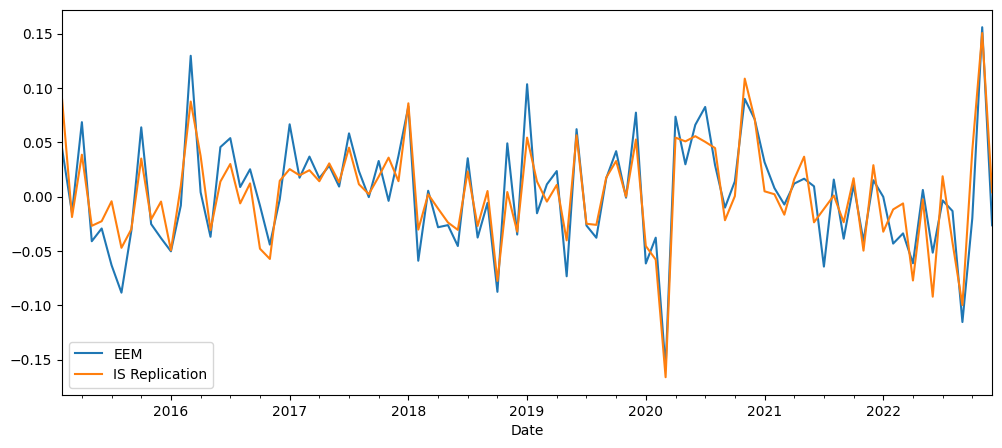

In [ ]:
pd.concat([y, mod_replicate.fittedvalues.rename('IS Replication')], axis=1).plot(figsize=(12, 5))
plt.show()

## 2.3

In [ ]:
reg = LinearRegression(fit_intercept=True).fit(X,y)
fit_comp_IS = pd.concat([y,pd.DataFrame(reg.predict(X),index=y.index)],axis=1).rename(columns={0:'IS'})
corr_IS = fit_comp_IS.corr().iloc[0,1]

In [ ]:
rets_OOS = rets.loc[T2:,:]
X = sm.add_constant(rets_OOS.drop(columns=TICKrep))
y = rets_OOS[[TICKrep]]

fit_comp_OOS = pd.concat([y,pd.DataFrame(reg.predict(X),index=y.index)],axis=1).rename(columns={0:'OOS'})
corr_OOS = fit_comp_OOS.corr().iloc[0,1]

In [ ]:
print(f'Correlation between {TICKrep} and Replicating Portfolio')
print(f'In-Sample: {corr_IS:.1%}')
print(f'Out-of-Sample: {corr_OOS:.1%}')

Correlation between EEM and Replicating Portfolio
In-Sample: 88.8%
Out-of-Sample: 85.0%


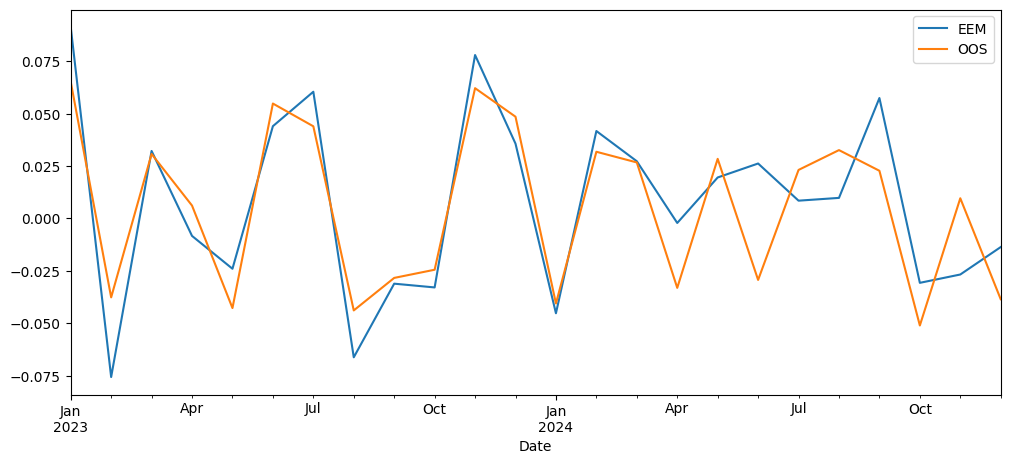

In [ ]:
fit_comp_OOS.plot(figsize=(12, 5))
plt.show()